<a href="https://colab.research.google.com/github/Ishita95-harvad/Geology-Forecast-Challenge/blob/main/Geology_Forecast_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geology Forecast Challenge**

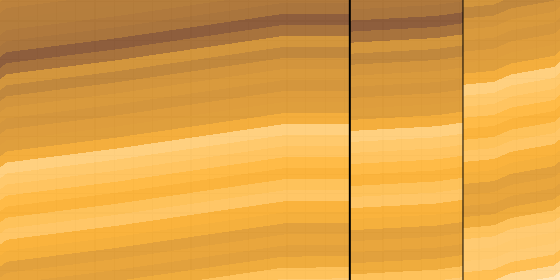

Your task is to create a data-driven model that predicts likely 1D layer-depth sequences based on formations where lateral wells are typical

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [4]:
import streamlit as st
import numpy as np
import requests
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

# Mistral AI API setup
MISTRAL_API_KEY = "your_mistral_api_key"  # Replace with your API key
MISTRAL_API_URL = "https://api.mistral.ai/v1/chat/completions"

# Function to call Mistral AI API for geological context
def get_mistral_prediction(input_data, prompt="Predict geological layer properties and deformations:"):
    headers = {
        "Authorization": f"Bearer {MISTRAL_API_KEY}",
        "Content-Type": "application/json"
    }
    data = {
        "model": "mistral-large",
        "messages": [{"role": "user", "content": f"{prompt} {input_data}"}],
        "max_tokens": 500
    }
    try:
        response = requests.post(MISTRAL_API_URL, headers=headers, json=data)
        response.raise_for_status()
        return response.json()["choices"][0]["message"]["content"]
    except requests.exceptions.RequestException as e:
        return f"Error: {str(e)}"

# Simple Transformer Model for sequence prediction
class LayerDepthPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LayerDepthPredictor, self).__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=1, dim_feedforward=hidden_dim), # Changed nhead to 1
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, 1)  # Predict depth

    def forward(self, x):
        x = self.encoder(x)
        return self.fc(x)

# Generate synthetic well data (replace with real well logs)
def generate_synthetic_data(num_points=100):
    depths = np.linspace(1000, 2000, num_points)
    gamma_ray = np.random.normal(50, 10, num_points) + np.sin(depths / 200) * 20  # Simulated log
    return np.column_stack((depths, gamma_ray))

# Preprocess data
scaler = StandardScaler()
def preprocess_data(data):
    return scaler.fit_transform(data)

# Streamlit Interface
st.title("Geological Layer-Depth Predictor")
st.write("Input well log data to predict layer-depth sequences.")

# Input: Well data up to current drilling location
uploaded_data = st.file_uploader("Upload well log data (CSV)", type="csv")
if uploaded_data:
    data = np.genfromtxt(uploaded_data, delimiter=',')
else:
    st.write("Using synthetic data for demonstration.")
    data = generate_synthetic_data()

# Preprocess
data_scaled = preprocess_data(data)

# Initialize model
model = LayerDepthPredictor(input_dim=data_scaled.shape[1], hidden_dim=128, num_layers=2)
model.eval()

# Predict layer depths
with torch.no_grad():
    input_tensor = torch.tensor(data_scaled, dtype=torch.float32).unsqueeze(0)
    predicted_depths = model(input_tensor).squeeze().numpy()

# Augment with Mistral AI for deformation prediction
input_context = f"Well log data: {data[:5].tolist()}. Predict layer properties and deformations."
mistral_output = get_mistral_prediction(input_context)

# Display results
st.subheader("Predicted Layer Depths")
st.line_chart(predicted_depths)
st.subheader("Mistral AI Geological Insights")
st.write(mistral_output)

# Save predictions
if st.button("Save Predictions"):
    np.savetxt("predicted_depths.csv", predicted_depths, delimiter=",")
    st.write("Predictions saved to predicted_depths.csv")

2025-05-31 15:33:10.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-31 15:33:10.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [8]:
import streamlit as st
import numpy as np
import pandas as pd
import requests
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

# Fix random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Mistral AI API setup
MISTRAL_API_KEY = "your_mistral_api_key"  # Replace with your API key
MISTRAL_API_URL = "https://api.mistral.ai/v1/chat/completions"

# Function to call Mistral AI API for geological context
def get_mistral_prediction(input_data, prompt="Predict geological layer properties and deformations for 300 positions:"):
    headers = {
        "Authorization": f"Bearer {MISTRAL_API_KEY}",
        "Content-Type": "application/json"
    }
    data = {
        "model": "mistral-large",
        "messages": [{"role": "user", "content": f"{prompt} {input_data}"}],
        "max_tokens": 500
    }
    try:
        response = requests.post(MISTRAL_API_URL, headers=headers, json=data)
        response.raise_for_status()
        return response.json()["choices"][0]["message"]["content"]
    except requests.exceptions.RequestException as e:
        return f"Error: {str(e)}"

# Transformer Model for sequence prediction
class LayerDepthPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LayerDepthPredictor, self).__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=4, dim_feedforward=hidden_dim),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, 300)  # Predict 300 positions

    def forward(self, x):
        x = self.encoder(x)
        return self.fc(x)

# Idealized covariance matrix
def get_covariance_matrix(x):
    log_slopes = [1.0406028049510443, 0.0, 7.835345062351012]
    log_offsets = [-6.430669850650689, -2.1617411566043896, -45.24876794412965]
    D_T_inv = np.zeros_like(x, dtype=float)
    for i, pos in enumerate(x):
        if 1 <= pos <= 60:
            k = 1
        elif 61 <= pos <= 244:
            k = 2
        else:  # 245 <= pos <= 300
            k = 3
        D_T_inv[i] = np.exp(log_slopes[k-1] * np.log(pos) + log_offsets[k-1])
    return 1 / D_T_inv  # Return D_T for Gaussian kernel

# NLL Loss Calculation
def compute_nll_loss(true_depths, pred_depths, D_T):
    num_realizations = pred_depths.shape[0]
    E_i_G = np.zeros(num_realizations)
    for i in range(num_realizations):
        misfit = true_depths - pred_depths[i]
        E_i_G[i] = np.sum(D_T * misfit**2)
    p_i = 1 / num_realizations
    loss = -np.log(np.sum(p_i * np.exp(-0.5 * E_i_G)))
    return loss

# Generate synthetic well data (replace with real data)
def generate_synthetic_data(num_rows=10):
    data = pd.DataFrame()
    data["geology_id"] = [f"id_{i}" for i in range(num_rows)]
    for col in range(-299, 1):
        data[str(col)] = np.where(col >= -49, np.random.normal(0, 10, num_rows), np.nan)
    for col in range(1, 301):
        data[str(col)] = np.random.normal(0, 10, num_rows)
        for r in range(1, 10):
            data[f"r_{r}_pos_{col}"] = np.random.normal(0, 10, num_rows)
    return data

# Preprocess data
scaler = StandardScaler()
def preprocess_data(data):
    input_cols = [str(i) for i in range(-299, 1)]
    input_data = data[input_cols].fillna(method="ffill").values
    input_data = scaler.fit_transform(input_data)
    return torch.tensor(input_data, dtype=torch.float32).unsqueeze(1)

# Streamlit Interface
st.title("Geological Layer-Depth Sequence Predictor")
st.write("Predict 10 realizations of layer depths for lateral wells.")

# Input: Well data and number of realizations
uploaded_data = st.file_uploader("Upload well log data (CSV)", type="csv")
num_realizations = st.slider("Number of Realizations", 1, 20, 10)

if uploaded_data:
    data = pd.read_csv(uploaded_data)
else:
    st.write("Using synthetic data for demonstration.")
    data = generate_synthetic_data()

# Preprocess
input_data = preprocess_data(data)

# Initialize model
model = LayerDepthPredictor(input_dim=input_data.shape[2], hidden_dim=128, num_layers=2)
model.eval()

# Predict realizations
predictions = []
D_T = get_covariance_matrix(np.arange(1, 301))
with torch.no_grad():
    base_pred = model(input_data).squeeze().numpy()
    for i in range(num_realizations):
        noise = np.random.normal(0, np.sqrt(D_T), base_pred.shape)
        predictions.append(base_pred + noise * (1 + 0.1 * i))  # Scale noise for diversity
predictions = np.array(predictions)

# Augment with Mistral AI
input_context = f"Well log data (first 5 rows, -49 to 0): {data.iloc[:5, -49:].to_dict()}. Predict layer properties and deformations for 300 positions."
mistral_output = get_mistral_prediction(input_context)

# Evaluate NLL (if true depths provided)
if uploaded_data and all(col in data.columns for col in [str(i) for i in range(1, 301)]):
    true_depths = data[[str(i) for i in range(1, 301)]].values
    nll_loss = compute_nll_loss(true_depths, predictions, D_T)
    st.subheader("NLL Loss")
    st.write(f"Negative Log Likelihood Loss: {nll_loss:.4f}")

# Display results
st.subheader("Predicted Layer Depths (10 Realizations)")
for i, pred in enumerate(predictions[:num_realizations]):
    # Removed the 'key' parameter as it's not supported by st.line_chart()
    st.line_chart(pred[0], use_container_width=True)


# Save predictions
if st.button("Save Predictions"):
    output_df = pd.DataFrame({f"r_{i}_pos_{j+1}": predictions[i, :, j] for i in range(num_realizations) for j in range(300)})
    output_df.insert(0, "geology_id", data["geology_id"])
    output_df.to_csv("predicted_depths.csv", index=False)
    st.write("Predictions saved to predicted_depths.csv")


Streaming output truncated to the last 5000 lines.
  data[f"r_{r}_pos_{col}"] = np.random.normal(0, 10, num_rows)
<ipython-input-8-0d6c0ec336bd>:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"r_{r}_pos_{col}"] = np.random.normal(0, 10, num_rows)
<ipython-input-8-0d6c0ec336bd>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[str(col)] = np.random.normal(0, 10, num_rows)
<ipython-input-8-0d6c0ec336bd>:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 